In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
df = pd.read_csv("data.csv", sep=";", decimal=",")
df.head()

,Param,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,FRT,Singapore,1.830000,1.730000,1.720000,1.740000,1.710000,1.670000,1.660000,1.610000,...,1.190000,1.250000,1.240000,1.200000,1.160000,1.140000,1.140000,1.100000,1.120000,1.040000
1,FRT,Indonesia,3.098000,3.056000,2.942000,2.882000,2.838000,2.798000,2.770000,2.738000,...,2.427000,2.389000,2.345000,2.309000,2.262000,2.234000,2.215000,2.194000,2.175000,2.153000
2,FRT,Australia,1.902000,1.849000,1.888000,1.859000,1.842000,1.822000,1.796000,1.778000,...,1.855000,1.826000,1.814000,1.752000,1.741000,1.740000,1.657000,1.581000,1.700000,1.630000
3,LEB,Singapore,75.295122,75.646341,75.946341,76.046341,76.197561,76.295122,76.595122,76.897561,...,82.246341,82.495122,82.743902,82.846341,83.095122,83.297561,83.595122,83.543902,83.092683,82.895122
4,LEB,Indonesia,63.181000,63.537000,64.126000,64.598000,64.856000,65.237000,65.355000,65.733000,...,69.264000,69.533000,69.699000,69.798000,69.936000,70.338000,70.518000,68.808000,67.570000,68.250000


In [5]:
df = pd.melt(df, id_vars=["Country Name", "Param"], var_name="Year", value_vars=["1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]).pivot(index = ["Country Name", "Year"], columns = "Param", values = "value").reset_index()
df.head()

Param,Country Name,Year,FRT,LEB,NM,P65,PT
0,Australia,1990,1.902,76.994634,100093.0,1887174.0,17065128.0
1,Australia,1991,1.849,77.275610,68847.0,1942287.0,17284036.0
2,Australia,1992,1.888,77.378049,40767.0,1994928.0,17478635.0
3,Australia,1993,1.859,77.878049,23833.0,2041998.0,17634808.0
4,Australia,1994,1.842,77.878049,51941.0,2087652.0,17805468.0


In [6]:
df["AP"] = df["P65"]/df["PT"]
df["NP"] = df["NM"]/df["PT"]
df = df.drop(columns = ['P65', 'PT', 'NM'], axis=1)
df.head()

Param,Country Name,Year,FRT,LEB,AP,NP
0,Australia,1990,1.902,76.994634,0.110587,0.005865
1,Australia,1991,1.849,77.275610,0.112375,0.003983
2,Australia,1992,1.888,77.378049,0.114135,0.002332
3,Australia,1993,1.859,77.878049,0.115794,0.001351
4,Australia,1994,1.842,77.878049,0.117248,0.002917


<Axes: xlabel='FRT', ylabel='AP'>

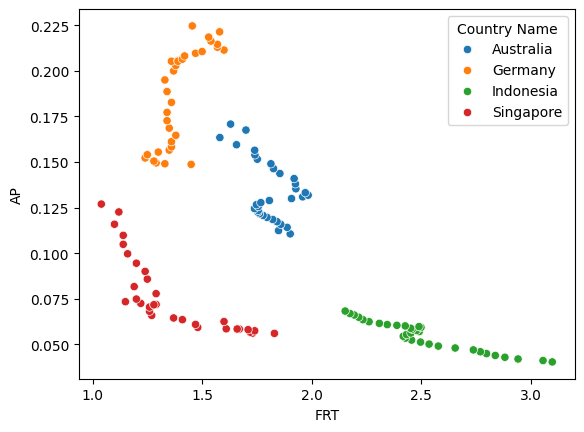

In [7]:
sns.scatterplot(data=df, x="FRT", y="AP", hue="Country Name")

<Axes: xlabel='LEB', ylabel='AP'>

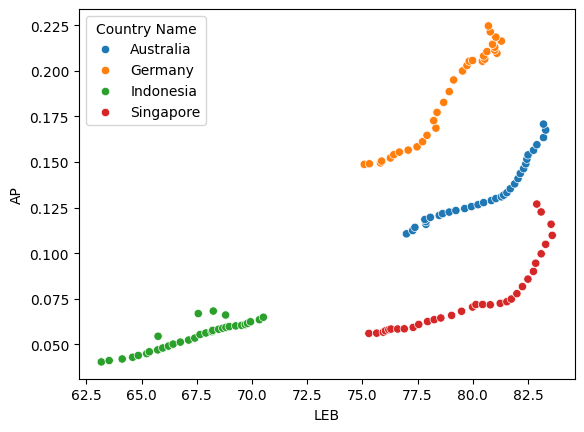

In [8]:
sns.scatterplot(data=df, x="LEB", y="AP", hue="Country Name")

<Axes: xlabel='NP', ylabel='AP'>

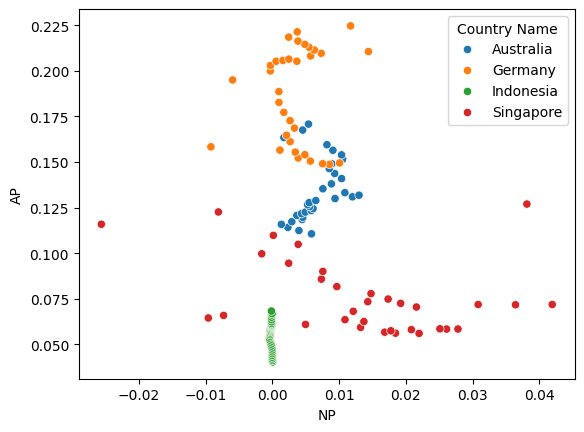

In [9]:
sns.scatterplot(data=df, x="NP", y="AP", hue="Country Name")

<Axes: xlabel='Year', ylabel='AP'>

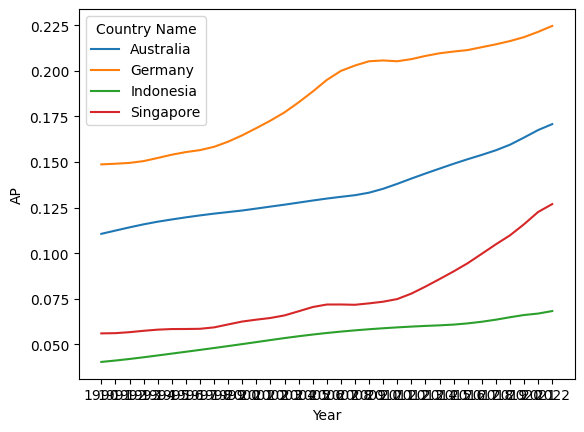

In [30]:
sns.lineplot(data=df, x="Year", y="AP", hue="Country Name")

<Axes: xlabel='Year', ylabel='FRT'>

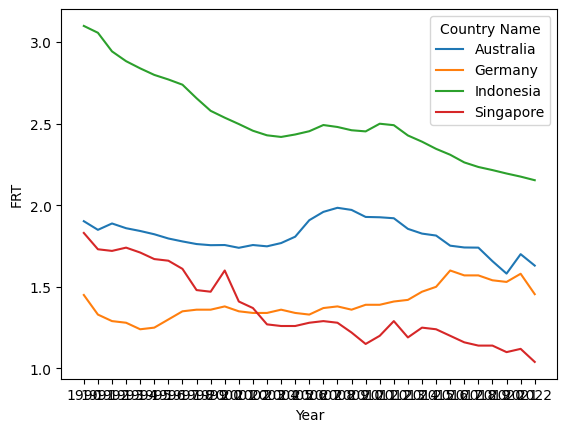

In [10]:
sns.lineplot(data=df, x="Year", y="FRT", hue="Country Name")

<Axes: xlabel='Year', ylabel='LEB'>

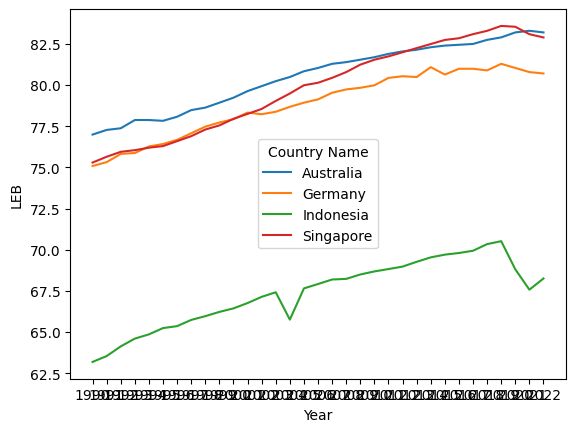

In [11]:
sns.lineplot(data=df, x="Year", y="LEB", hue="Country Name")

<Axes: xlabel='Year', ylabel='NP'>

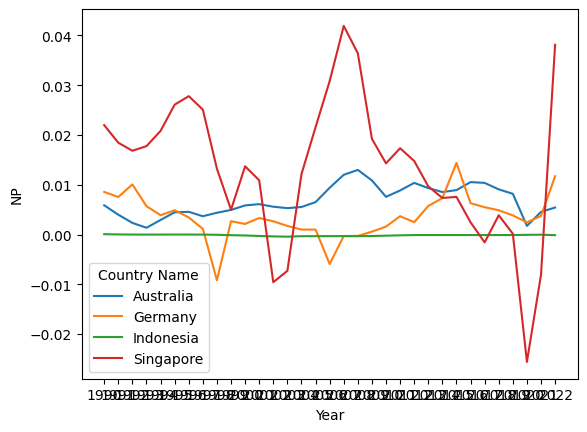

In [12]:
sns.lineplot(data=df, x="Year", y="NP", hue="Country Name")

In [13]:
dfIndonesia = df.loc[df["Country Name"] == "Indonesia"]
dfIndonesia.reset_index(drop=True, inplace=True)
dfIndonesia = dfIndonesia.drop(columns = ['Country Name', 'Year'], axis=1)
dfIndonesia.head()

Param,FRT,LEB,AP,NP
0,3.098,63.181,0.040353,0.000063
1,3.056,63.537,0.041110,0.000017
2,2.942,64.126,0.041964,-0.000014
3,2.882,64.598,0.042906,-0.000018
4,2.838,64.856,0.043897,-0.000013


In [14]:
dfIndonesia.corr()

Param,FRT,LEB,AP,NP
Param,,,,
FRT,1.000000,-0.877347,-0.951953,0.434987
LEB,-0.877347,1.000000,0.909144,-0.341982
AP,-0.951953,0.909144,1.000000,-0.298479
NP,0.434987,-0.341982,-0.298479,1.000000


In [15]:
dfIndonesia.describe()

Param,FRT,LEB,AP,NP
count,33.000000,33.000000,33.000000,33.000000
mean,2.519667,67.362273,0.054657,-0.000151
std,0.249429,2.034836,0.008097,0.000134
min,2.153000,63.181000,0.040353,-0.000434
25%,2.389000,65.750000,0.047983,-0.000293
50%,2.459000,67.649000,0.056219,-0.000111
75%,2.655000,68.823000,0.060413,-0.000041
max,3.098000,70.518000,0.068247,0.000063


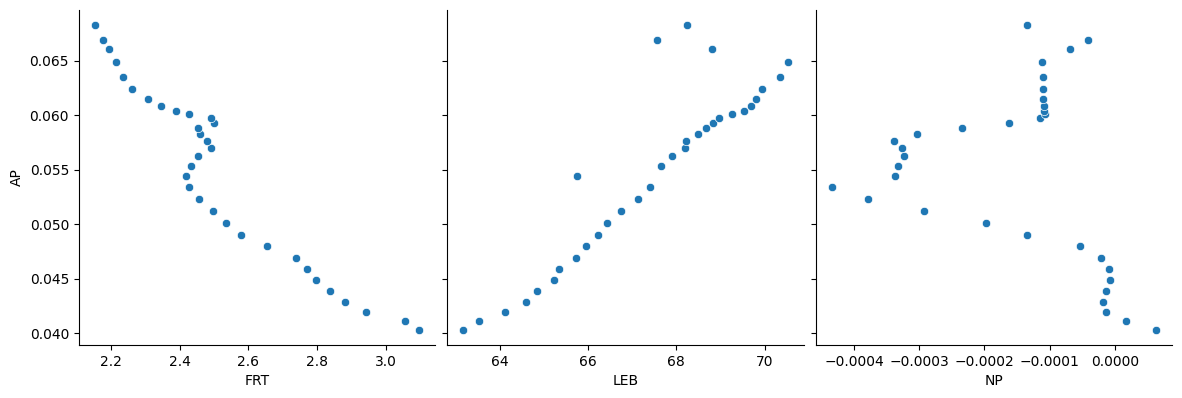

In [17]:
sns.pairplot(dfIndonesia, x_vars=['FRT', 'LEB', 'NP'], y_vars='AP', height=4, aspect=1, kind='scatter')
plt.show()

In [18]:
X = dfIndonesia[['FRT', 'LEB', 'NP']] 
y = dfIndonesia['AP']

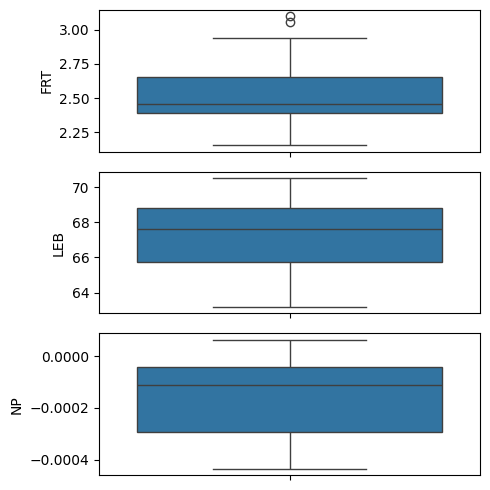

In [19]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(dfIndonesia['FRT'], ax = axs[0])
plt2 = sns.boxplot(dfIndonesia['LEB'], ax = axs[1])
plt2 = sns.boxplot(dfIndonesia['NP'], ax = axs[2])
plt.tight_layout()

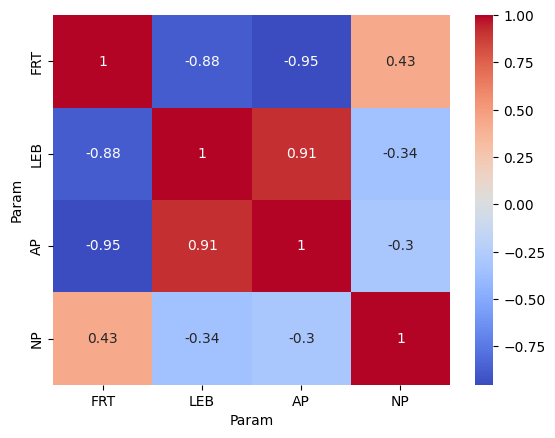

In [20]:
sns.heatmap(dfIndonesia.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [22]:
y_train.shape

(23,)

In [23]:
y_test.shape

(10,)

In [24]:
reg_model = LinearRegression().fit(X_train, y_train)

In [25]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  0.05067312143979308


[('FRT', np.float64(-0.02628160872410802)),
 ('LEB', np.float64(0.0010660830624308788)),
 ('NP', np.float64(10.090810007151752))]

In [26]:
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [0.05434708 0.06651085 0.03825951 0.0646695  0.0466023  0.05601111
 0.0656781  0.05483689 0.04745486 0.05215191]


In [27]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
13,0.053426,0.054347
29,0.064857,0.066511
1,0.041110,0.038260
27,0.062384,0.064669
5,0.044907,0.046602
19,0.058273,0.056011
30,0.066079,0.065678
18,0.057662,0.054837
6,0.045923,0.047455
9,0.049041,0.052152


In [28]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.0019536349464094652
Mean Square Error: 4.5084617066389855e-06
Root Mean Square Error: 0.002123313850244232


In [29]:
reg_model.score(X, y)

0.9412251039469588